In [60]:
import matplotlib.pyplot as plt 
import numpy as np 
import pathlib
import os
import PIL
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Reshape, Flatten, Dropout, MaxPooling2D, Conv2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
train_p = '/Users/admin/Downloads/DSGP/Fruit Dataset_S/train'
vali_p = '/Users/admin/Downloads/DSGP/Fruit Dataset_S/val'
test_p = '/Users/admin/Downloads/DSGP/Fruit Dataset_S/test'

In [62]:
image_s = (128,128)

In [63]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_p,
    validation_split=None,
    subset=None,
    shuffle=True,
    batch_size=32,
    image_size=image_s
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    vali_p,
    validation_split=None,
    subset=None,
    shuffle=True,
    batch_size=32,
    image_size=image_s
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_p,
    validation_split=None,
    subset=None,
    shuffle=False,
    batch_size=32,
    image_size=image_s
)

Found 5280 files belonging to 3 classes.
Found 1320 files belonging to 3 classes.
Found 660 files belonging to 3 classes.


In [64]:
class_names = train_ds.class_names
print(class_names)

['Over Ripe', 'Ripe', 'Unripe']


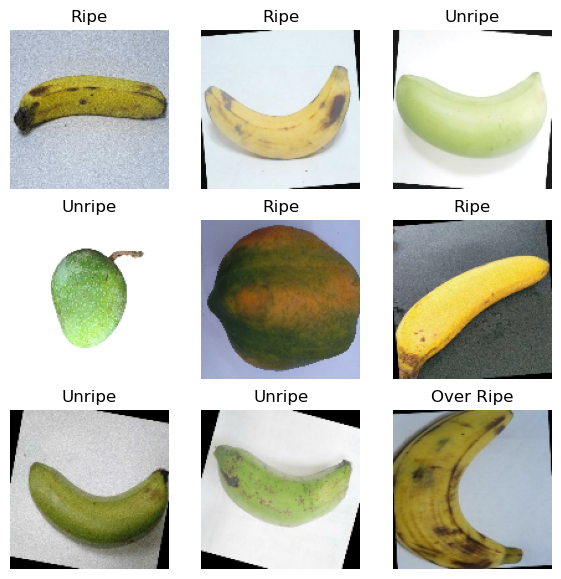

In [65]:
plt.figure(figsize=(7, 7))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [66]:
class_n = 3
input_s = (128,128,3)

In [67]:
efficientnet = tf.keras.applications.efficientnet.EfficientNetB1(
    include_top=False,
    weights='imagenet',
    input_shape=input_s,
    pooling="avg",
    classes=class_n
)

In [68]:
efficientnet.summary() 

Model: "efficientnetb1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 rescaling_12 (Rescaling)    (None, 128, 128, 3)          0         ['input_7[0][0]']             
                                                                                                  
 normalization_6 (Normaliza  (None, 128, 128, 3)          7         ['rescaling_12[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_13 (Rescaling)    (None, 128, 128, 3)          0         ['normalization_6

In [69]:
for layer in efficientnet.layers[:-5]:
    layer.trainable = False

In [70]:
for layer in efficientnet.layers:
    print(layer.name, layer.trainable)

input_7 False
rescaling_12 False
normalization_6 False
rescaling_13 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block1b_dwconv False
block1b_bn False
block1b_activation False
block1b_se_squeeze False
block1b_se_reshape False
block1b_se_reduce False
block1b_se_expand False
block1b_se_excite False
block1b_project_conv False
block1b_project_bn False
block1b_drop False
block1b_add False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False

In [71]:
inputs = tf.keras.Input(shape=input_s, name='image_input')
model =  tf.keras.applications.efficientnet.preprocess_input(inputs)
model = efficientnet(model)
model = Flatten()(model)
model = Dense(256, activation='relu')(model)
model = Dropout(.2)(model)
model = Dense(128, activation='relu')(model)
model = Dropout(.2)(model)
model = Dense(64, activation='relu')(model)
model = Dropout(.2)(model)
model = Dense(32, activation='relu')(model)
model = Dropout(.2)(model)
model = Dense(16, activation='relu')(model)
model = Dropout(.2)(model)
outputs = Dense(class_n, activation='softmax')(model)

efficientnet_model = tf.keras.Model(inputs, outputs, name='output')

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
fig = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=2)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import cv2
image=cv2.imread('/Users/admin/Downloads/DSGP/Ripe-Yellow-Mango-500x375.png')
image_resized = cv2.resize(image, (img_height, img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

In [ ]:
pred=efficientnet_model.predict(image)
print(pred)

In [ ]:
output_class = class_names[np.argmax(pred)]
print("The fruit is a", output_class)